# Automatic Ligand parameterization tutorial using BioExcel Building Blocks (biobb)
***
This tutorial aims to illustrate the process of **ligand parameterization** for a **small molecule**, step by step, using the **BioExcel Building Blocks library (biobb)**. The particular example used is the **Ibuprofen** small compound (3-letter code IBP, Drugbank code [DB01050](https://www.drugbank.ca/drugs/DB01050)), a non-steroidal **anti-inflammatory drug** (NSAID) derived from propionic acid and it is considered the first of the propionics. 

**OpenBabel and ACPype** packages are used to **add hydrogens**, **energetically minimize the structure**, and 
**generate parameters** for the **GROMACS** package. With *Generalized Amber Force Field (GAFF)* forcefield and *AM1-BCC* charges.  
***
**Biobb modules** used:

 - [biobb_io](https://github.com/bioexcel/biobb_io): Tools to fetch data to be consumed by the rest of the Biobb building blocks.
 - [biobb_chemistry](https://github.com/bioexcel/biobb_chemistry): Tools to manipulate chemistry data.
 
**Auxiliar libraries** used:

 - [nglview](http://nglviewer.org/#nglview): Jupyter/IPython widget to interactively view molecular structures and trajectories in notebooks.
 - [ipywidgets](https://github.com/jupyter-widgets/ipywidgets): Interactive HTML widgets for Jupyter notebooks and the IPython kernel.

Conda **Installation**:

 - **conda install -c bioconda biobb_ligand_parameterization**

***
### Pipeline steps:
 1. [Input Parameters](#input)
 2. [Fetching Ligand Structure](#fetch)
 3. [Add Hydrogen Atoms](#addh)
 4. [Energetically Minimize Hydrogen Atoms](#min)
 5. [Generating Ligand Parameters](#acpype)
 6. [Output Files](#output)
 
***
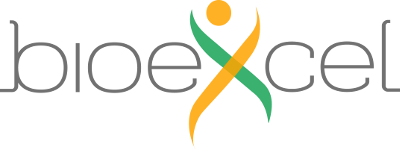
***

<a id="input"></a>
***
## Input parameters
**Input parameters** needed:
 - **ligandCode**: 3-letter code of the ligand structure (e.g. IBP)
 - **mol_charge**: Molecule net charge (e.g. -1)
 - **pH**: Acidity or alkalinity for the small molecule. Hydrogen atoms will be added according to this pH. (e.g. 7.4)

In [ ]:
import nglview
import ipywidgets
import os

ligandCode = 'IBP'
mol_charge = -1
pH = 7.4

<a id="fetch"></a>
***
## Fetching ligand structure
Downloading **ligand structure** in **PDB format** from the IRB PDB MIRROR database.<br>
Alternatively, a **PDB file** can be used as starting structure. <br>
***
**Building Blocks** used:

 - [Ligand](https://biobb-io.readthedocs.io/en/latest/api.html#module-api.ligand) from **biobb_io.api.ligand**
***

In [ ]:
# Ligand: Download ligand structure from MMB PDB mirror REST API (http://mmb.irbbarcelona.org/api/)
# Import module
from biobb_io.api.ligand import Ligand
from biobb_io.api.pdb import Pdb

# Create prop dict and inputs/outputs
input_structure = ligandCode + '.pdb'

prop = {
    'ligand_code' : ligandCode
}

#Create and launch bb
Ligand(output_pdb_path=input_structure,
        properties=prop).launch()

### Visualizing 3D structure
Visualizing the downloaded/given **ligand PDB structure** using **NGL**:    

In [ ]:
#Show small ligand structure
view = nglview.show_file(input_structure)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','300px'])
view.camera='orthographic'
view

<a id="addh"></a>
***
## Add Hydrogen Atoms
Adding **Hydrogen atoms** to the small molecule, according to the given pH.
***
**Building Blocks** used:
 - [BabelAddHydrogens](https://biobb-chemistry.readthedocs.io/en/latest/babelm.html#module-babelm.babel_add_hydrogens) from **biobb_chemistry.babelm.babel_add_hydrogens** 
***

In [ ]:
# Babel_add_hydrogens: add Hydrogen atoms to a small molecule
# Import module
from biobb_chemistry.babelm.babel_add_hydrogens import BabelAddHydrogens

# Create prop dict and inputs/outputs
output_babel_h = ligandCode + '.H.mol2' 

prop = {
    'ph' : pH,
    'input_format' : 'pdb',
    'output_format' : 'mol2'
}

#Create and launch bb
BabelAddHydrogens(input_path=input_structure,
                  output_path=output_babel_h,
                  properties=prop).launch()

### Visualizing 3D structure
Visualizing the **ligand PDB structure** with the newly added **hydrogen atoms** using **NGL**:    

In [ ]:
#Show small ligand structure
view = nglview.show_file(output_babel_h)
view.add_representation(repr_type='ball+stick', selection='all')
view.camera='orthographic'
view

<a id="min"></a>
***
## Energetically minimize Hydrogen Atoms
Energetically minimize newly added **Hydrogen atoms**.
***
**Building Blocks** used:
 - [BabelMinimize](https://biobb-chemistry.readthedocs.io/en/latest/babelm.html#module-babelm.babel_minimize) from **biobb_chemistry.babelm.babel_minimize** 
***

In [ ]:
# Babel_minimize: Structure energy minimization of a small molecule after being modified adding hydrogen atoms
# Import module
from biobb_chemistry.babelm.babel_minimize import BabelMinimize

# Create prop dict and inputs/outputs
output_babel_min = ligandCode + '.H.min.pdb'                              
prop = {
    'method' : 'sd',
    'criteria' : '1e-10',
    'force_field' : 'GAFF'
}


#Create and launch bb
BabelMinimize(input_path=output_babel_h,
              output_path=output_babel_min,
              properties=prop).launch()

### Visualizing 3D structure
Visualizing the **ligand PDB structure** with the newly added **hydrogen atoms**, **energetically minimized**, using **NGL**:    

In [ ]:
#Show small ligand structure
view = nglview.show_file(output_babel_min)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','300px'])
view.camera='orthographic'
view

### Visualizing 3D structures
Visualizing all the structures generated so far:

 - Original **ligand PDB structure** (left)
 - **Ligand PDB structure** with **hydrogen atoms** (middle)
 - **Ligand PDB structure** with **hydrogen atoms energetically minimized** (right)  

In [ ]:
#Show different structures generated (for comparison)
view1 = nglview.show_file(input_structure)
view1.add_representation(repr_type='ball+stick')
view1._remote_call('setSize', target='Widget', args=['250px','300px'])
view1.camera='orthographic'
view1
view2 = nglview.show_file(output_babel_h)
view2.add_representation(repr_type='ball+stick')
view2._remote_call('setSize', target='Widget', args=['250px','300px'])
view2.camera='orthographic'
view2
view3 = nglview.show_file(output_babel_min)
view3.add_representation(repr_type='ball+stick')
view3._remote_call('setSize', target='Widget', args=['250px','300px'])
view3.camera='orthographic'
view3
ipywidgets.HBox([view1, view2, view3])

<a id="acpype"></a>
***
## Generating ligand parameters
**Building GROMACS topology** corresponding to the **ligand structure**.

**Force field** used in this tutorial step is **amberGAFF**: [General AMBER Force Field](http://ambermd.org/antechamber/gaff.html), designed for rational drug design.

***
**Building Blocks** used:
- [AcpypeParamsGMX](https://biobb-chemistry.readthedocs.io/en/latest/acpype.html#module-acpype.acpype_params_gmx) from **biobb_chemistry.acpype.acpype_params_gmx** 
***

In [ ]:
# Acpype_params_gmx: Generation of topologies for GROMACS with ACPype
# Import module
from biobb_chemistry.acpype.acpype_params_gmx import AcpypeParamsGMX

# Create prop dict and inputs/outputs
output_acpype_gro = ligandCode + 'params.gro'
output_acpype_itp = ligandCode + 'params.itp'
output_acpype_top = ligandCode + 'params.top'
output_acpype = ligandCode + 'params'
prop = {
    'basename' : output_acpype,
    'charge' : mol_charge
}

#Create and launch bb
AcpypeParamsGMX(input_path=output_babel_min,
                output_path_gro=output_acpype_gro,
                output_path_itp=output_acpype_itp,
                output_path_top=output_acpype_top,
                properties=prop).launch()

### Visualizing 3D structure
Visualizing the generated **GROMACS** gro structure corresponding to the parameterized **ligand PDB structure** using **NGL**:    

In [ ]:
#Show small ligand structure
view = nglview.show_file(output_acpype_gro)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','300px'])
view.camera='orthographic'
view

<a id="output"></a>
## Output files

Important **Output files** generated:
 - {{output_acpype_gro}}: **Structure** of the parameterized ligand in gro (GROMACS) format.
 - {{output_acpype_top}}: **Topology** of the parameterized ligand, including a reference to the {{output_acpype_itp}}.
 - {{output_acpype_itp}}: **Include Topology File (itp)** of the parameterized ligand, including the parameters information: bonds, angles, dihedrals, etc.